# Statistical Rethinking: Chapter 2 Practice Answers

### 2E1

- (2) $Pr(\text{rain}|\text{Monday})$
- (4) $Pr(\text{rain}, \text{Monday})/Pr(\text{Monday})$

### 2E2

- (3) $Pr(\text{Monday}|\text{rain})$

### 2E3

- (1) $Pr(\text{Monday}|\text{rain})$
- (4) $Pr(\text{rain}, \text{Monday})Pr(\text{Monday})/Pr(\text{rain})$

### 2E4

To say that "the probability of water is 0.7" is a reflection of our certainty that the globe will yield water. It is an epistemological claim about us as an observer, not an absolute, objective claim about the mechanics of the globe. With an accurate enough physical model we could predict with far greater than 0.7 accuracy whether the globe will yield water or land.

### 2M1

Here we use some of the code from [the pymc-devs Python/pymc3 port of the Statistical Rethinking code examples](https://github.com/pymc-devs/resources/blob/master/Rethinking_2/Chp_02.ipynb).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [76]:
def posterior_grid_approx_2m1(grid_points=5, water=3, tosses=3):
    p_grid = np.linspace(0, 1, grid_points)
    # Doesn't really matter what the number is here in the prior, as long as it's uniform.
    prior = np.repeat(100, grid_points)
    likelihood = stats.binom.pmf(water, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

#### (1)

In [77]:
def plot_posterior(p_grid, posterior):
    plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}')
    plt.xlabel('probability of water', fontsize=14)
    plt.ylabel('posterior probability', fontsize=14)
    plt.title(f'{points} points')
    plt.legend(loc=0);

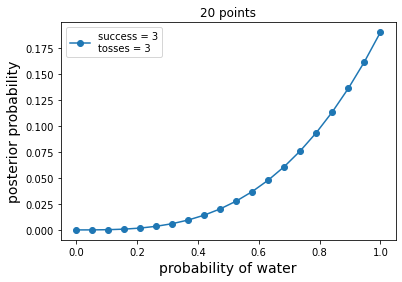

In [78]:
points = 20
w, n = 3, 3
p_grid, posterior = posterior_grid_approx_2m1(points, w, n)
plot_posterior(p_grid, posterior)

#### (2)

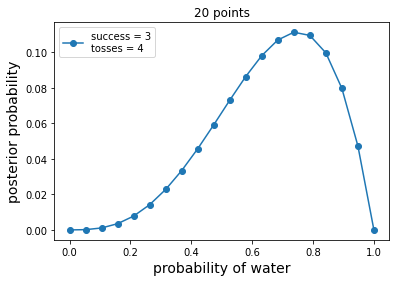

In [79]:
points = 20
w, n = 3, 4
p_grid, posterior = posterior_grid_approx_2m1(points, w, n)
plot_posterior(p_grid, posterior)

#### (3)

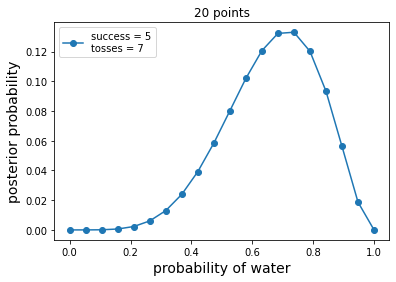

In [81]:
points = 20
w, n = 5, 7
p_grid, posterior = posterior_grid_approx_2m1(points, w, n)
plot_posterior(p_grid, posterior)

### 2M2

In [86]:
def posterior_grid_approx_2m2(grid_points=5, water=3, tosses=3):
    p_grid = np.linspace(0, 1, grid_points)
    # Doesn't really matter what the number is here in the prior, as long as it's uniform.
    prior = np.repeat(100, grid_points)
    prior = (p_grid >= 0.5)*1
    likelihood = stats.binom.pmf(water, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

#### (1)

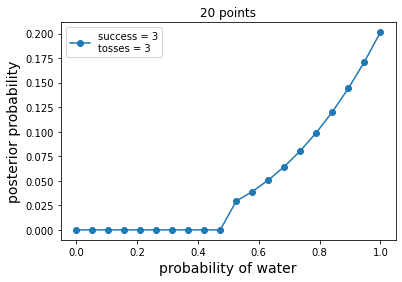

In [87]:
points = 20
w, n = 3, 3
p_grid, posterior = posterior_grid_approx_2m2(points, w, n)
plot_posterior(p_grid, posterior)

#### (2)

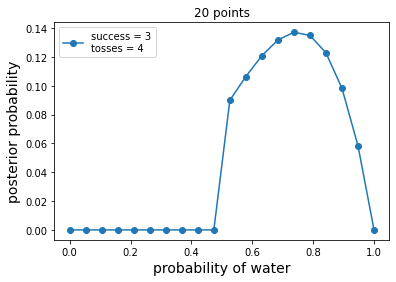

In [88]:
points = 20
w, n = 3, 4
p_grid, posterior = posterior_grid_approx_2m2(points, w, n)
plot_posterior(p_grid, posterior)

#### (3)

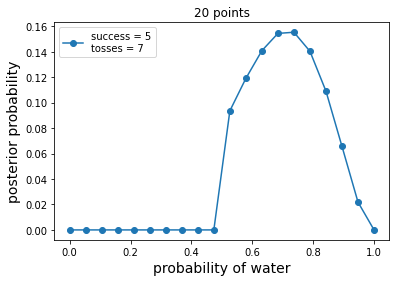

In [89]:
points = 20
w, n = 5, 7
p_grid, posterior = posterior_grid_approx_2m2(points, w, n)
plot_posterior(p_grid, posterior)

### 2M3

$$P(\text{Earth}|\text{land}) = \frac{P(\text{Earth}, \text{land})}{P(\text{land})}$$

$$= \frac{P(\text{land}|\text{Earth})P(\text{Earth})}{P(\text{land})}$$

$$= \frac{P(\text{land}|\text{Earth})P(\text{Earth})}{\sum_{p \in \text{planets}}P(\text{land}|\text{p})P(p)}$$

Now substituting in the known values in their respective locations:

In [96]:
(0.3*0.5)/(0.3*0.5 + 1*0.5)

0.23076923076923075

### 2M4

This is a rewording of [Bertrand's box paradox](https://en.wikipedia.org/wiki/Bertrand%27s_box_paradox).

Personally, the difficulty with this problem is not the counterintuitive answer, but converting the information we know about the problem into the language of probability.

We want to know: $P(\text{black down}|\text{black up})$

$$P(\text{black down}|\text{black up}) = \frac{P(\text{black down}, \text{black up})}{P(\text{black up})}$$

$$= \frac{P(\text{black down}, \text{black up})}{P(\text{black up})}$$

$$= \frac{P(\text{black down}, \text{black up})}{\sum_{c \in \text{cards}}P(\text{black up}|c)P(c)}$$

$$= \frac{P(\text{B/B card})}{P(\text{black up}|\text{B/B card})P(\text{B/B card})+P(\text{black up}|\text{B/W card})P(\text{B/W card})}$$

We omit the third term in the denominator that corresponds to the $W/W$ card since we know it can't show a black face and so that term is 0. Substituting in known probabilities:

In [97]:
(1/3)/(1*(1/3) + (1/2)*(1/3))

0.6666666666666666

### 2M5

$$P(\text{black down}|\text{black up}) = \frac{P(\text{black down}, \text{black up})}{P(\text{black up})}$$

$$= \frac{P(\text{black down}, \text{black up})}{P(\text{black up})}$$

$$= \frac{P(\text{B/B card})}{\sum_{c \in \text{cards}}P(\text{black up}|c)P(c)}$$

Substituting the values in:

In [98]:
(2/4)/(1*(2/4) + (1/2)*(1/4) + (0)*(1/4))

0.8

### 2M6

$$P(\text{B/B card}) = 1/6$$
$$P(\text{B/W card}) = 2/6$$
$$P(\text{W/W card}) = 3/6$$

$$P(\text{black down}|\text{black up}) = \frac{P(\text{B/B card})}{\sum_{c \in \text{cards}}P(\text{black up}|c)P(c)}$$

In [99]:
(1/6)/(1*(1/6) + (1/2)*(2/6) + (0)*(3/6))

0.5

### 2M7

This is a bit more overwhelming, but all the same rules apply. The sums are there to marginalize out variables, and we omit terms where we know the probability is zero.

$$P(\text{black down card 1}|\text{black up card 1},\text{white up card 2})$$

$$=\frac{P(\text{B/B card 1}, \text{white up card 2})}{P(\text{black up card 1},\text{white up card 2})}$$

$$=\frac{P(\text{B/B card 1})P(\text{white up card 2}|\text{B/B card 1})}{P(\text{black up card 1},\text{white up card 2})}$$

$$=\frac{P(\text{B/B card 1})P(\text{white up card 2}|\text{B/B card 1},\text{B/W card 2}) + P(\text{B/B card 1})P(\text{white up card 2}|\text{B/B card 1},\text{W/W card 2})}{P(\text{black up card 1},\text{white up card 2})}$$

$$=\frac{P(\text{B/B card 1})P(\text{white up card 2}|\text{B/B card 1},\text{B/W card 2}) + P(\text{B/B card 1})P(\text{white up card 2}|\text{B/B card 1},\text{W/W card 2})}{P(\text{B/B card 1})P(\text{B/W card 2, white up})+P(\text{B/B card 1})P(\text{W/W card 2, white up)}+P(\text{B/W card 1})P(\text{W/W card 2, white up)}}$$
 

In [100]:
((1/3)*(1/2)*(1/2) + (1/3)*(1/2))/((1/3)*(1/2)*(1/2) + (1/3)*(1/2)*1 + (1/3)*(1/2)*(1/2))

0.75

### 2H1

I honestly found these hard questions in some ways easier than some of the medium ones above, because for the above questions I found a bit tricky to translate the words into the language of probability.

$$P(\text{twins}|A) = 0.1$$
$$P(\text{single}|A) = 0.9$$
$$P(\text{twins}|B) = 0.2$$
$$P(\text{single}|B) = 0.8$$
$$P(A) = P(B) = 0.5$$

$$P(\text{next twins} | \text{last twins}) = \frac{P(\text{next twins},\text{last twins})}{P(\text{last twins})}$$

Assuming conditional independence of the first and second births being twins, given the species:

$$\frac{P(\text{twins}|A)P(A)P(\text{twins}|A) + P(\text{twins}|B)P(B)P(\text{twins}|B)}{\sum_{s \in species} P(\text{twins}|s)P(s)}$$

Substituting in the respective values:

In [104]:
(0.1*0.5*0.1 + 0.2*0.5*0.2)/(0.1*0.5 + 0.2*0.5)

0.16666666666666669

### 2H2

$$P(A|\text{twins}) = \frac{P(A, \text{twins})}{P(\text{twins})}$$
$$ = \frac{P(\text{twins}|A)P(A)}{\sum_{s \in species}P(\text{twins}|s)P(s))}$$

Substituting in the respective values:

In [105]:
(0.1*0.5)/(0.1*0.5 + 0.2*0.5)

0.3333333333333333

### 2H3

$$P(A|\text{twins then single}) = \frac{P(A, \text{twins}, \text{single})}{P(\text{twins}, \text{single})}$$
$$ = \frac{P(\text{twins}|A)P(\text{single}|A)P(A)}{\sum_{s \in species}P(\text{twins}|s)P(\text{single}|s)P(s))}$$

In [108]:
(0.1*0.9*0.5)/(0.1*0.9*0.5 + 0.2*0.8*.5)

0.36

### 2H4

$$P(A_{test}|A) = 0.8$$
$$P(B_{test}|A) = 0.2$$
$$P(A_{test}|B) = 0.35$$
$$P(B_{test}|B) = 0.65$$

$$P(A|A_{test}) =  \frac{P(A, A_{test})}{P(A_{test})}$$
$$P(A|A_{test}) =  \frac{P(A_{test}|A)P(A)}{\sum_{s\in species}P(A_{test}|s)P(s)}$$

Substituting in the respective values:

In [111]:
(0.8*0.5)/(0.8*0.5 + 0.35*0.5)

0.6956521739130436